#1.웹 수집

- 크롤링(Crawling), 스크래핑(Scarping)

- HTTP(Hyper Text Transfer Protocol): 인터넷에서 데이터를 주고 받을 수 있는 프로토콜

- HTML: 웹에 사용되는 표준 Markup언어

- 파싱(Parsing) : 어떤 페이지(문서, html)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보 가공



- 절차
 - URL 소스 수집(목록, 검색, 사이트맵)
 - Fetch(요청/렌더링) → Parse(선택자/정제) → Normalize(공백/인코딩)
 - Dedupe(내용 해시) → 메타데이터 부착(소스, 크롤 시각, 해시)
 - 저장(CSV/JSONL/Parquet/SQLite) → 품질검사(결측/중복/길이)
 - 한도 고려/재시도/로깅 → 스케줄러(cron) 운영

- HTML 소개

<Strong>
Hypertext Markup <U>Language </U> (HTML)
</Strong>

<h1>Test</h1>
<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading</h3>
<h4>This is heading</h4>
<h5>This is heading</h5>
<h6>This is heading</h6>

# This is heading1

1) HTML의 역할
 - 콘텐츠의 구조를 정의(제목, 문단, 목록, 표, 폼 등)
 - 의미를 담는 시맨틱 마크업으로 SEO/접근성/유지보수성 향상
 - CSS(표현), JS(행동)와 구분된 표현-행동-구조 분리

2) 기본 문서 골격





<!doctype html>: HTML5 선언

<html lang="ko"> : 언어 설정(검색·TTS·맞춤법·스크린리더)

<head>: 메타데이터, 리소스 링크, SEO 정보

<body>: 사용자에게 보이는 실제 콘텐츠

<!doctype html>
<html lang="ko">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>문서 제목</title>
  <meta name="description" content="페이지 한줄 요약">
  <link rel="icon" href="/favicon.ico">
  <link rel="preconnect" href="https://fonts.googleapis.com">
  <script defer src="/app.js"></script>
  <link rel="stylesheet" href="/styles.css">
</head>
<body>
  <main>콘텐츠…</main>
</body>
</html>

- HTML 태그?: 태그 내부에 값을 넣을 수 있을 뿐만 아니라, 태그마다 속성을 부여할 수 있음. 태그의 속성은 <태그 속성="값"> 의 형태로 사용, 태그마다 여러 속성을 부여 할 수도 있음.

3) 시맨틱 레이아웃 요소
 - 페이지 뼈대: <header> <nav> <main> <section> <article> <aside> <footer>
 - 텍스트 그룹: <h1~h6> <p> <blockquote> <pre> <code> <figure> <figcaption>
 - 의미에 맞는 태그 사용 → 스크린리더·검색봇이 구조를 이해

4) 링크 & 내비게이션
 - <a href="…"> : 내·외부 링크, download, target="_blank", rel="noopener noreferrer"
 - 스킵 링크: <a href="#main">본문으로 건너뛰기</a>
 - 내비: <nav>에 사이트/섹션 메뉴 배치

5) 이미지·미디어
 - <img src="…" alt="대체텍스트"> (접근성·SEO 핵심)
 - 반응형 이미지: srcset/sizes, <picture>
 - 비디오/오디오: <video controls> <audio controls> + <track kind="captions">
 - 성능: loading="lazy"(img/iframe 지연 로딩)

6) 리스트·표
 - 리스트: <ul> <ol> <dl>
 - 표: <table> <thead> <tbody> <tfoot> <th> <td> + scope/headers로 의미 부여
 - 표는 데이터 표현에만, 레이아웃 용도로 사용 금지

7) 폼(Form)
 - <form method="get|post" action="…"> + 입력요소
 - 입력유형: type="text email url tel number date time range file checkbox radio password search"
 - 레이블: <label for="id"> (접근성)
 - 검증 속성: required minlength maxlength pattern min max step
 - 자동완성: autocomplete="email|name|one-time-code|off"
 - 모바일 키패드: inputmode="numeric", enterkeyhint="search"
 - 그룹: <fieldset><legend> / 선택: <select><option> / 텍스트박스: <textarea>

8) 글로벌 속성(대부분 요소 공통)
 - id class title style hidden tabindex contenteditable draggable
 - lang dir(텍스트 방향) data-*(사용자 정의 데이터)
 - 접근성: role 및 aria-*(필요할 때만, 시맨틱 태그 우선)

- Xpath: XML 문서의 특정 요소나 속성에 접근하기 위한 경로를 지정하는 언어.

 - /html/body/div/span/a...

1) 개념
- XML/HTML 트리에서 노드를 찾는 경로 언어
- 셀레니움/플레이라이트/크롤러에서 안정적인 요소 지정자로 사용
- 인덱스는 1부터 시작(주의)

2) 기본 표기
- 절대 경로: /html/body/div
- 상대 경로: //div(문서 어디든), .//a(현재 노드 기준)
- 현재/부모: . / ..
- 속성: @href, [@id='x']
- 와일드카드: *(모든 태그)
- 조건(프레디케이트): []
- 합집합: | (예: //h1 | //h2)
- 텍스트 노드: text() 또는 normalize-space(.)

3) 축(Axes) 핵심
- child::(생략 가능), descendant::(= //), parent::, ancestor::
- following-sibling::, preceding-sibling::
- self::node()(자기 자신), attribute::(= @)
- 예) 라벨 옆 입력창:
- //label[normalize-space()='이메일']/following-sibling::input

4) 자주 쓰는 함수/패턴 (XPath 1.0 기준)
- 포함: contains( @class, 'btn' )
- 시작: starts-with( @id, 'user_' )
- 공백 정리: normalize-space(.)
- 대소문자 무시: contains( translate(., 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'abcdefghijklmnopqrstuvwxyz'), 'login')
- 위치/개수: position(), last()
- 부정: not(@disabled)
- n번째 요소: (//li[@role='option'])[3]
- 마지막 행: (//table//tr)[last()]
- 형제 중 n번째: //ul/li[position()=2]

- XPath 2.0+의 ends-with, matches, lower-case 등은 브라우저/셀레니움 기본은 미지원 → 1.0 함수로 우회(예: translate).

## 1.1. requests - 웹페이지 읽기 / urllib, urllib2 을 사용하거나 requests 를 사용
- HTTP GET, POST, PUT, DELETE 등을 사용할 수 있음
- 데이타 인코딩 기능을 제공: 데이타를 Dictionary로 만들어 GET, POST 등에서 사용


In [ ]:
#!pip install requests

In [1]:
import requests
res = requests.get('http://www.naver.com')
print('결과: ', res.status_code) #200은 정상적인 접속

결과:  200


In [ ]:
import requests
res = requests.get('https://www.naver.com/abcdefg')
print('결과 : ', res.status_code) #400수준 코드는 접속 불가

결과 :  404


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과: ', res.status_code)

if res.status_code == requests.codes.ok:
  print('ok')
else :
  print("error code:",res.status_code)

결과:  200
ok


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과 : ', res.status_code)

res.raise_for_status() #res가 정상이 아닌 경우 오류
print('crawling start')

결과 :  200
crawling start


In [ ]:
import requests
res = requests.get('http://naver.com')
res.raise_for_status()

res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

In [ ]:
import requests
res = requests.get('http://google.com')
res.raise_for_status()

with open('crawl1.html','w', encoding = 'utf-8') as f:
  f.write(res.text)


##1.2.beautifulsoup : HTML 파싱을 위한 라이브러리

In [ ]:
#!pip install beautifulsoup4 #Parsing을 위한 라이브러리
#!pip install lxml #XML parser로 이용

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday.nhn'
res = requests.get(url)

In [ ]:
soup = BeautifulSoup(res.text, "lxml")
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<title>네이버 웹툰</title>
<link href="https://shared-comic.pstatic.net/favicon/favicon_96x96.ico" rel="icon" type="image/x-icon"/>
<link href="https://ssl.pstatic.net/static/wcc/kw-owner/prod-1.0/index.css" rel="stylesheet" type="text/css"/>
<link href="https://m.comic.naver.com/webtoon/weekday" rel="canonical"/>
<meta content="6Wv2YrpTSpapViVikuUS-ebAqZDiKxcrDV_clkRzH9A" name="google-site-verification"/>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v3.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<script>
		if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
			window.location = 'microso

In [ ]:
soup.title

<title>네이버 웹툰</title>

In [ ]:
soup.title.get_text() #해당 태그에 대한 텍스트값

'네이버 웹툰'

- 네이버 주가 정보

In [ ]:
# 아래 주소에 대해서 1~5페이지까지의 주가정보를 수집하셔서 csv로 만드세요.

# 주가 예측하는 모형도 만들어보세요.


import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    data = [column.get_text().strip() for column in columns]
    print(data)


['']
['1', '삼성전자', '70,000', '보합0', '0.00%', '100', '4,143,747', '5,919,638', '50.52', '10,507,671', '13.56', '9.03', '']
['2', 'SK하이닉스', '263,000', '하락\n\t\t\t\t4,500', '-1.68%', '5,000', '1,914,646', '728,002', '55.41', '1,690,601', '7.37', '31.06', '']
['3', 'LG에너지솔루션', '384,000', '상승\n\t\t\t\t1,000', '+0.26%', '500', '898,560', '234,000', '4.19', '108,072', '-90.80', '-4.93', '']
['4', '삼성바이오로직스', '1,024,000', '하락\n\t\t\t\t4,000', '-0.39%', '2,500', '728,822', '71,174', '12.85', '33,935', '56.96', '10.45', '']
['5', '삼성전자우', '57,400', '상승\n\t\t\t\t100', '+0.17%', '100', '468,369', '815,975', '74.21', '1,219,026', '11.12', 'N/A', '']
['']
['']
['']
['6', '현대차', '219,000', '상승\n\t\t\t\t2,500', '+1.15%', '5,000', '448,420', '204,758', '36.19', '442,222', '4.77', '12.43', '']
['7', '한화에어로스페이스', '827,000', '하락\n\t\t\t\t61,000', '-6.87%', '5,000', '426,429', '51,563', '43.82', '256,827', '16.72', '53.94', '']
['8', 'KB금융', '109,400', '상승\n\t\t\t\t2,200', '+2.05%', '5,000', '417,320', '38

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #비어있는 라인 제외시키기
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)


['1', '삼성전자', '70,000', '보합0', '0.00%', '100', '4,143,747', '5,919,638', '50.52', '10,507,671', '13.56', '9.03', '']
['2', 'SK하이닉스', '263,000', '하락\n\t\t\t\t4,500', '-1.68%', '5,000', '1,914,646', '728,002', '55.41', '1,690,601', '7.37', '31.06', '']
['3', 'LG에너지솔루션', '384,000', '상승\n\t\t\t\t1,000', '+0.26%', '500', '898,560', '234,000', '4.19', '108,072', '-90.80', '-4.93', '']
['4', '삼성바이오로직스', '1,024,000', '하락\n\t\t\t\t4,000', '-0.39%', '2,500', '728,822', '71,174', '12.85', '33,935', '56.96', '10.45', '']
['5', '삼성전자우', '57,400', '상승\n\t\t\t\t100', '+0.17%', '100', '468,369', '815,975', '74.21', '1,219,026', '11.12', 'N/A', '']
['6', '현대차', '219,000', '상승\n\t\t\t\t2,500', '+1.15%', '5,000', '448,420', '204,758', '36.19', '442,222', '4.77', '12.43', '']
['7', '한화에어로스페이스', '827,000', '하락\n\t\t\t\t61,000', '-6.87%', '5,000', '426,429', '51,563', '43.82', '256,827', '16.72', '53.94', '']
['8', 'KB금융', '109,400', '상승\n\t\t\t\t2,200', '+2.05%', '5,000', '417,320', '381,462', '77.67', '1,

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '') #utf-8에서 인코딩 문제 발생 시, utf-8-signature로 인코딩
writer = csv.writer(f)

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')

  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)
    writer.writerow(data)


['1', '삼성전자', '70,000', '보합0', '0.00%', '100', '4,143,747', '5,919,638', '50.52', '10,507,671', '13.56', '9.03', '']
['2', 'SK하이닉스', '263,000', '하락\n\t\t\t\t4,500', '-1.68%', '5,000', '1,914,646', '728,002', '55.41', '1,690,601', '7.37', '31.06', '']
['3', 'LG에너지솔루션', '384,000', '상승\n\t\t\t\t1,000', '+0.26%', '500', '898,560', '234,000', '4.19', '108,072', '-90.80', '-4.93', '']
['4', '삼성바이오로직스', '1,024,000', '하락\n\t\t\t\t4,000', '-0.39%', '2,500', '728,822', '71,174', '12.85', '33,935', '56.96', '10.45', '']
['5', '삼성전자우', '57,400', '상승\n\t\t\t\t100', '+0.17%', '100', '468,369', '815,975', '74.21', '1,219,026', '11.12', 'N/A', '']
['6', '현대차', '219,000', '상승\n\t\t\t\t2,500', '+1.15%', '5,000', '448,420', '204,758', '36.19', '442,222', '4.77', '12.43', '']
['7', '한화에어로스페이스', '827,000', '하락\n\t\t\t\t61,000', '-6.87%', '5,000', '426,429', '51,563', '43.82', '256,827', '16.72', '53.94', '']
['8', 'KB금융', '109,400', '상승\n\t\t\t\t2,200', '+2.05%', '5,000', '417,320', '381,462', '77.67', '1,

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi2.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '')
writer = csv.writer(f)

title = 'N	종목명	현재가	전일비	등락률	액면가	시가총액	상장주식수	외국인비율	거래량	PER	ROE'.split('\t')
writer.writerow(title)

for page in range(1,5):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)
    writer.writerow(data)



['1', '삼성전자', '70,000', '보합0', '0.00%', '100', '4,143,747', '5,919,638', '50.52', '10,507,671', '13.56', '9.03', '']
['2', 'SK하이닉스', '263,000', '하락\n\t\t\t\t4,500', '-1.68%', '5,000', '1,914,646', '728,002', '55.41', '1,690,601', '7.37', '31.06', '']
['3', 'LG에너지솔루션', '384,000', '상승\n\t\t\t\t1,000', '+0.26%', '500', '898,560', '234,000', '4.19', '108,072', '-90.80', '-4.93', '']
['4', '삼성바이오로직스', '1,024,000', '하락\n\t\t\t\t4,000', '-0.39%', '2,500', '728,822', '71,174', '12.85', '33,935', '56.96', '10.45', '']
['5', '삼성전자우', '57,400', '상승\n\t\t\t\t100', '+0.17%', '100', '468,369', '815,975', '74.21', '1,219,026', '11.12', 'N/A', '']
['6', '현대차', '219,000', '상승\n\t\t\t\t2,500', '+1.15%', '5,000', '448,420', '204,758', '36.19', '442,222', '4.77', '12.43', '']
['7', '한화에어로스페이스', '827,000', '하락\n\t\t\t\t61,000', '-6.87%', '5,000', '426,429', '51,563', '43.82', '256,827', '16.72', '53.94', '']
['8', 'KB금융', '109,400', '상승\n\t\t\t\t2,200', '+2.05%', '5,000', '417,320', '381,462', '77.67', '1,

- api 활용 수집


In [ ]:
!pip install -U pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 34.6 MB/s eta 0:00:00


In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)



/usr/local/lib/python3.11/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').apply(how)


,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-31,81000,90000,80200,88800,207737907


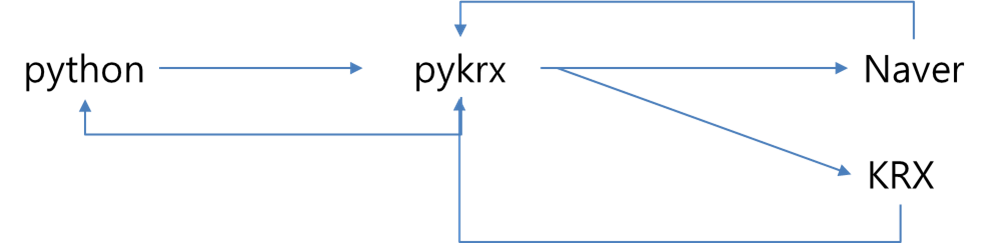

In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [ ]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



/usr/local/lib/python3.11/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').apply(how)


,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,58900,69500,57800,66700,460991347
2020-12-31,67100,81300,67100,81000,529998852
2021-01-31,81000,90000,80200,88800,207737907


In [ ]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


/usr/local/lib/python3.11/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').apply(how)
/usr/local/lib/python3.11/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: The provided callable <built-in function sum> is currently using DatetimeIndexResampler.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.resample('M').apply(how)


,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-04,-1189876714363,69165156608,1031014166618,89697391137,0
2021-01-05,-536265643081,16098509714,728387733108,-208220599741,0
2021-01-06,-1369155503764,37370130195,1729261196142,-397475822573,0
2021-01-07,1033917002121,36342229807,-1183634539101,113375307173,0
2021-01-08,-1147931424901,63596153201,-559141825960,1643477097660,0
2021-01-11,-3743203896260,-31327947241,4492145003867,-717613160366,0
2021-01-12,-1723898682006,30388878033,2312445113552,-618935309579,0
2021-01-13,-372450411172,9868157834,169086090692,193496162646,0
2021-01-14,-1428981445508,38743362517,712730906649,677507176342,0


In [ ]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


/usr/local/lib/python3.11/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').apply(how)


## 1.3. 정규 표현식(Regular Expression)

참고


<figure>
<img src = 'https://miro.medium.com/max/700/1*Y-q0dkUClSW0dX6uuysnJQ.png'>
<figure>

<figure>
<img src = 'https://miro.medium.com/max/700/1*c__WeRlFyGY_-7LeKQkNnQ.png'>
<figure>



<figure>
<img src = 'https://miro.medium.com/max/661/1*6pIp6zuIoRHUOXjEDDUNCA.png'>
<figure>

In [ ]:
import re
r = re.compile("a.c")
r.search("kkk")
# 아무런 결과도 출력되지 않는다.
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r = re.compile("ab?c")
r.search("abbc")
# 아무것도 출력되지 않음
r.search("abc")
# b가 있는 것으로 판단하여 abc를 매치함.

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("ac")
# b가 없는 것으로 판단하여 ac를 매치함.

<re.Match object; span=(0, 2), match='ac'>

- 0개 이상 문자 매치


In [ ]:
r = re.compile("ab*c")
r.search("a")
# 아무것도 출력되지 않음.

In [ ]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

- '+' : 최소 1번 이상 출현


In [ ]:
r = re.compile('ab+c')
r.search("ac")
# 아무것도 출력되지 않는다.

r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

- ' ^': 시작 문자 지정

In [ ]:
r = re.compile('^a')
r.search('bbc')
# 아무것도 출력되지 않음
r.search('ab')

<re.Match object; span=(0, 1), match='a'>

{숫자}: 출현 빈도 지정
{숫자1, 숫자2}
{숫자,}

문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타낸다. 예를 들어 정규 표현식이 ab{2}c라면 a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치한다.

In [ ]:
r = re.compile("ab{2}c")
r.search("ac")
# 아무것도 출력되지 않는다.
r.search("abc")
# 아무것도 출력되지 않는다.
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search("abbbbbc")

In [ ]:
r = re.compile("ab{2,8}c")
r.search('ac')
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [ ]:
r.search("abbbbbbbbbbbbbc")

In [ ]:
r = re.compile("a{2,}bc")
r.search("bc")
# 아무런 결과도 출력되지 않음
r.search("aa")
# 아무런 결과도 출력되지 않음
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [ ]:
r.search("aaaaabc")

<re.Match object; span=(0, 7), match='aaaaabc'>

[] : [ ] 안 문자들과 매치
[a-zA-Z]
[0–9]

In [ ]:
r = re.compile("[abc]")
r.search('zzz')
# 아무것도 출력되지 않음
r.search('a')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('acg')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('babo')

<re.Match object; span=(0, 1), match='b'>

[^문자]:  ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치

In [ ]:
r = re.compile('[^abc]')
r.search("a")
# 아무것도 출력되지 않음
r.search("ahoho")

<re.Match object; span=(1, 2), match='h'>

In [ ]:
r.search("1st")

<re.Match object; span=(0, 1), match='1'>

- re.match()와 re.search()의 차이
 - search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규표현식과 매치하는지를 확인
문자열 중간에 찾을 패턴이 있다고 하더라도, match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음

In [ ]:
r = re.compile("ab.")
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

In [ ]:
r.match("kkkabc")
# 아무것도 출력되지 않음

In [ ]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

 - re.split(): 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴

In [ ]:
text = "사과 딸기 수박 멜론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '멜론', '바나나']

In [ ]:
text = """사과
딸기
수박
멜론
바나나"""
re.split("\n", text)

['사과', '딸기', '수박', '멜론', '바나나']

In [ ]:
text = "사과+딸기+수박+멜론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '멜론', '바나나']

 - re.findall(): 정규 표현식과 매치되는 모든 문자열들을 리스트로 반환

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
re.findall("\d+", text)

['010', '1234', '1234', '30']

In [ ]:
re.findall("\d+", "문자열입니당.")

[]

 - re.sub()

In [ ]:
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

정규 표현식 텍스트 전처리 연습

In [ ]:
text = """100 John    PROF
101 James    STUD
102 Mac    STUD"""
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

'\s+' 는 공백 여러 개를 기준으로 split


In [ ]:
re.findall('\d+', text)

['100', '101', '102']

'\d+' 숫자 문자열을 반환

In [ ]:
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [ ]:
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

In [ ]:
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

#2. 뉴스 수집

In [ ]:
from bs4 import BeautifulSoup
import urllib
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2025.08.01"
enddate = "2025.08.02"
searchword = "전기차" #검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+urllib.parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_url = soup.select('a[href^="https://n.news.naver.com/mnews/article/"]')  #클래스 표시
    t_len = len(t_url)
    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                url = soup.select('a[href^="https://n.news.naver.com/mnews/article/"]')[j]['href']
                urls.append(url)
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls})
result.Url[0] #1행 출력

In [ ]:
result

In [ ]:
"news.naver.com" in result.Url[0]

 - 본문 수집

In [ ]:
articles = []
dates = []
likes = []

for i in result.Url:
   try:
    if( "news.naver.com" in i ):
     print(i)
     time.sleep(0.45)
     html = urllib.request.urlopen(i).read()
     soup = BeautifulSoup(html, 'html.parser')
    article = soup.find('article', {'id': 'dic_area'})
    for tag in article.find_all(['span', 'strong']):
      tag.decompose()
    for br in article.find_all('br'):
      br.replace_with('\n')
    news = article.get_text(strip=True, separator='\n')
    articles.append(news)
    time_span = soup.find('span', class_='_ARTICLE_DATE_TIME')
    news_time = time_span.get('data-date-time')
    dates.append(news_time)
   except Exception as e:
    print(e)
    continue


In [ ]:
result.to_csv("news.csv")

In [ ]:
# 수집된 내용을 표로 정리하기, news컬럼, date컬럼
train_data = pd.DataFrame({'articles':articles, 'date':dates})
train_data

## 실습

In [ ]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.naver.com')
print('결과: ', res.status_code)  # 200은 정상적인 접속

if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'html.parser')
    print("페이지 제목:", soup.title.string)

    # 주요 헤드라인 링크와 텍스트 추출 예시
    headlines = soup.find_all('a')[:10]
    for i, h in enumerate(headlines, 1):
        print(f"{i}. {h.get_text(strip=True)} -> {h.get('href')}")


결과:  200
페이지 제목: NAVER
1. 상단영역 바로가기 -> #topAsideButton
2. 서비스 메뉴 바로가기 -> #shortcutArea
3. 새소식 블록 바로가기 -> #newsstand
4. 쇼핑 블록 바로가기 -> #shopping
5. 관심사 블록 바로가기 -> #feed
6. MY 영역 바로가기 -> #account
7. 위젯 보드 바로가기 -> #widgetboard
8. 보기 설정 바로가기 -> #viewSetting


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://news.naver.com/section/105'  # IT/과학 뉴스 섹션
res = requests.get(url)
print('네이버 뉴스(IT/과학) 접속 결과: ', res.status_code)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'html.parser')
    print("페이지 제목:", soup.title.string)

    # 기사 제목 수집 (a 태그 중 class에 'sa_text_title' 또는 'cluster_text_headline' 포함)
    titles = soup.find_all('a', class_='sa_text_title')
    if not titles:
        titles = soup.find_all('a', class_='cluster_text_headline')

    print("\n=== 기사 제목 수집 결과 ===")
    for i, t in enumerate(titles[:20], 1):  # 최대 20개 출력
        print(f"{i}. {t.get_text(strip=True)}")


네이버 뉴스(IT/과학) 접속 결과:  200
페이지 제목: IT/과학 : 네이버 뉴스

=== 기사 제목 수집 결과 ===
1. 美 IT업계, 한미 정상회담 앞두고 '디지털 무역장벽 해소' 압박
2. 직접 받지 않아도 된다… 아이폰이 대신 보이스피싱 차단해준다
3. KT노조 "조합원 사망을 정치도구로...거짓선동 책임 묻겠다"
4. 유영상 SKT대표 “5000억개 매개변수 AI 모델 연내 출시”
5. '마이데이터' 확대 관련 한경협 "정보·기업 기밀 유출 우려"
6. 세계 최대 게임쇼 '게임스컴 2025' 개막... K-게임, 글로벌 시장 출사표
7. 인조이는 휴양지, 펍지는 전쟁터… 크래프톤 부스, 체험 열기 후끈[가봄]
8. K-게임 리더들 올해도 게임스컴 발걸음…"서구권 공략 박차"
9. 핀셋 집어 2㎜ 부품 '쓱'…'손기술' 좋아진 K-로봇 알렉스 공개 [팩플]
10. 은밀히 접근, 인재 뽑아갔다…75조 쿠팡 만든 ‘사냥꾼 조직’
11. 세수입 효자였는데…게임사 법인세 급감
12. 내 아이 말더듬는 것은 유전자 탓?
13. [해봄] 신더시티, 엔씨소프트 ‘변화’ 신호탄 될까
14. 팔짱 끼고 핀셋도 쓴다… “로봇 같지 않은 로봇”
15. AI가 통화요약·스팸차단하고 반려동물 X레이 진단…“이 모든 걸 국산 칩으로”
16. '다크AI'의 등장…딥페이크 사기에 기업도 속수무책
17. “푸틴, 트럼프와 통화서 젤렌스키와 모스크바 양자회담 제안”
18. "온 국민이 쓰는 '카톡', 15년 만에 바뀐다"…인스타처럼 게시물 먼저 뜬다는데
19. [게임스컴 라이브]삼성전자가 매년 '쾰른메세'서 게임팬 만나는 이유
20. “이거 실화? 삼성 무슨 일이야?”…MZ 사이에서 난리난 ‘OLED 캠페인’


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://news.naver.com/section/105'  # IT/과학 뉴스 섹션
res = requests.get(url)
print('네이버 뉴스(IT/과학) 접속 결과: ', res.status_code)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'html.parser')
    print("페이지 제목:", soup.title.string)

    # 기사 제목과 URL 수집 (a 태그 중 class에 'sa_text_title' 또는 'cluster_text_headline' 포함)
    titles = soup.find_all('a', class_='sa_text_title')
    if not titles:
        titles = soup.find_all('a', class_='cluster_text_headline')

    print("\n=== 기사 제목 및 URL 수집 결과 ===")
    for i, t in enumerate(titles[:20], 1):  # 최대 20개 출력
        title_text = t.get_text(strip=True)
        link = t.get('href')
        print(f"{i}. {title_text} -> {link}")


네이버 뉴스(IT/과학) 접속 결과:  200
페이지 제목: IT/과학 : 네이버 뉴스

=== 기사 제목 및 URL 수집 결과 ===
1. 美 IT업계, 한미 정상회담 앞두고 '디지털 무역장벽 해소' 압박 -> https://n.news.naver.com/mnews/article/421/0008438494
2. 직접 받지 않아도 된다… 아이폰이 대신 보이스피싱 차단해준다 -> https://n.news.naver.com/mnews/article/015/0005173288
3. KT노조 "조합원 사망을 정치도구로...거짓선동 책임 묻겠다" -> https://n.news.naver.com/mnews/article/092/0002387006
4. 유영상 SKT대표 “5000억개 매개변수 AI 모델 연내 출시” -> https://n.news.naver.com/mnews/article/030/0003342239
5. '마이데이터' 확대 관련 한경협 "정보·기업 기밀 유출 우려" -> https://n.news.naver.com/mnews/article/055/0001285492
6. 세계 최대 게임쇼 '게임스컴 2025' 개막... K-게임, 글로벌 시장 출사표 -> https://n.news.naver.com/mnews/article/014/0005394257
7. 인조이는 휴양지, 펍지는 전쟁터… 크래프톤 부스, 체험 열기 후끈[가봄] -> https://n.news.naver.com/mnews/article/005/0001797097
8. K-게임 리더들 올해도 게임스컴 발걸음…"서구권 공략 박차" -> https://n.news.naver.com/mnews/article/001/0015577062
9. 핀셋 집어 2㎜ 부품 '쓱'…'손기술' 좋아진 K-로봇 알렉스 공개 [팩플] -> https://n.news.naver.com/mnews/article/025/0003463343
10. 은밀히 접근, 인재 뽑아갔다…75조 쿠팡 만든 ‘사냥꾼 조직’ -> ht

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://news.naver.com/section/105'  # IT/과학 뉴스 섹션
res = requests.get(url)
print('네이버 뉴스(IT/과학) 접속 결과: ', res.status_code)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'html.parser')
    print("페이지 제목:", soup.title.string)

    # 기사 제목과 URL 수집
    titles = soup.find_all('a', class_='sa_text_title')
    if not titles:
        titles = soup.find_all('a', class_='cluster_text_headline')

    print("\n=== 기사 제목 및 URL 수집 결과 ===")
    for i, t in enumerate(titles[:5], 1):  # 최대 5개 기사만 본문 수집 예시
        title_text = t.get_text(strip=True)
        link = t.get('href')
        print(f"\n{i}. {title_text} -> {link}")

        # 각 기사 페이지 접속
        article_res = requests.get(link)
        if article_res.status_code == 200:
            article_soup = BeautifulSoup(article_res.text, 'html.parser')

            # 본문 내용 수집 (네이버 뉴스 본문 class는 'go_trans _article_content' 또는 'newsct_article_text')
            body = article_soup.find('article', class_='go_trans _article_content')
            if not body:
                body = article_soup.find('div', class_='newsct_article_text')

            if body:
                content = body.get_text(strip=True)
                print("본문 미리보기:", content[:200], "...")
            else:
                print("본문을 찾을 수 없음")


네이버 뉴스(IT/과학) 접속 결과:  200
페이지 제목: IT/과학 : 네이버 뉴스

=== 기사 제목 및 URL 수집 결과 ===

1. 美 IT업계, 한미 정상회담 앞두고 '디지털 무역장벽 해소' 압박 -> https://n.news.naver.com/mnews/article/421/0008438494
본문 미리보기: "미국 기업에 불이익 주지 않겠다는 협정 받아야"이재명 대통령이 지난 19일 서울 용산 대통령실 청사로 출근하며 서류를 보고 있다. (이재명 대통령 SNS. 재판매 및 DB 금지) 2025.8.20/뉴스1 ⓒ News1 허경 기자(서울=뉴스1) 손엄지 기자 = 한미 정상회담을 닷새 앞두고 미국 정보기술(IT) 업계가 당국에 온라인 플랫폼법, 고정밀 지도 데 ...

2. 직접 받지 않아도 된다… 아이폰이 대신 보이스피싱 차단해준다 -> https://n.news.naver.com/mnews/article/015/0005173288
본문 미리보기: “보험료 환급 대상자로 선정되셨습니다. 계좌번호를 알려주실 수 있나요?”보이스피싱 전화가 걸려오자 아이폰이 대신 발신자에게 용건을 물었다. 수신자는 직접 통화하지 않고 화면에 표시된 내용을 확인한 뒤 전화를 받지 않고 끊을 수 있었다. 가을에 출시될 애플의 새 운영체제 iOS 26에 탑재되는 ‘통화 스크리닝’ 기능의 실제 작동 모습이다.애플은 20일 서울  ...

3. KT노조 "조합원 사망을 정치도구로...거짓선동 책임 묻겠다" -> https://n.news.naver.com/mnews/article/092/0002387006
본문 미리보기: "유가족 만류에도 확인되지 않은 사실 유포"KT노동조합이 회사 2노조가 회사의 조직개편 이후 직원이 잇따라 죽음에 내몰렸다는 주장에 대해 “근거 없는 선전선동을 즉각 중단하라”고 밝혔다.20일 KT노조는 성명을 내고 “새노조(2노조)는 KT노동조합이 사업구조 개편 진행 후 조합원들을 방치했다는 근거 없는 거짓선동을 하고 있다”며 “새노조가 KT노동조합의

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json
from datetime import datetime
from pathlib import Path

URL = "https://www.ntis.go.kr/rndgate/eg/un/ra/mng.do?searchCondition=1m"
OUT = "ntis_rndgate.json"

# YYYY-MM-DD / YYYY.MM.DD / YYYY/MM/DD 탐지
DATE_RE = r"(20\d{2})[-./](\d{2})[-./](\d{2})"
DATE_PAIR_RE = re.compile(
    rf"{DATE_RE}\s*[\-~–]\s*{DATE_RE}"
)
DATE_SINGLE_RE = re.compile(DATE_RE)

def norm_date(y, m, d):
    return f"{int(y):04d}-{int(m):02d}-{int(d):02d}"

def extract_dates(text: str):
    text = re.sub(r"\s+", " ", text)
    # 범위 우선: 개시일 ~ 마감일
    m = DATE_PAIR_RE.search(text)
    if m:
        y1, m1, d1, y2, m2, d2 = m.groups()
        return norm_date(y1, m1, d1), norm_date(y2, m2, d2)
    # 개별 날짜 2개 이상이면 앞의 2개 사용
    singles = DATE_SINGLE_RE.findall(text)
    if len(singles) >= 2:
        (y1, m1, d1), (y2, m2, d2) = singles[0], singles[1]
        return norm_date(y1, m1, d1), norm_date(y2, m2, d2)
    elif len(singles) == 1:
        (y1, m1, d1) = singles[0]
        return norm_date(y1, m1, d1), ""
    else:
        return "", ""

def clean_text(el):
    return el.get_text(" ", strip=True) if el else ""

def parse_table_rows(soup: BeautifulSoup):
    items = []
    # 흔한 구조: table > tbody > tr
    for tr in soup.select("table tbody tr"):
        tds = tr.find_all("td")
        if not tds:
            continue
        # 제목은 보통 링크(a)에 존재
        title_el = tr.select_one("td a") or (tds[0].find("a") if tds else None)
        title = clean_text(title_el) or clean_text(tr)

        # 행 전체 텍스트에서 날짜 추출
        row_text = " ".join(clean_text(td) for td in tds)
        start_date, end_date = extract_dates(row_text)

        if title:
            items.append({
                "title": title,
                "start_date": start_date,
                "end_date": end_date
            })
    return items

def parse_cards(soup: BeautifulSoup):
    items = []
    # 카드/리스트형 대응: li, div.card, div.board-list 등
    selectors = [
        "ul li",
        "div.card, div.cards .card",
        "div.board-list li",
        "div.board-list .row",
        "div.list li",
    ]
    for sel in selectors:
        for box in soup.select(sel):
            # 제목 후보: a/strong/h3
            title_el = (
                box.select_one("a.title, a.subj, a") or
                box.select_one("strong, h3, .title, .subject")
            )
            title = clean_text(title_el) or clean_text(box)
            text = clean_text(box)
            start_date, end_date = extract_dates(text)
            if title:
                items.append({
                    "title": title,
                    "start_date": start_date,
                    "end_date": end_date
                })
    return items

def scrape_first_page(url=URL, out_path=OUT):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/120.0.0.0 Safari/537.36",
        "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    }
    with requests.Session() as s:
        r = s.get(url, headers=headers, timeout=20)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, "html.parser")

    items = []
    # 1) 테이블 우선
    items.extend(parse_table_rows(soup))
    # 2) 보조: 카드/리스트
    if not items:
        items.extend(parse_cards(soup))

    # 중복 제거
    seen = set()
    dedup = []
    for it in items:
        key = (it["title"], it["start_date"], it["end_date"])
        if it["title"] and key not in seen:
            seen.add(key)
            dedup.append(it)

    payload = {
        "source": url,
        "scraped_at": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "count": len(dedup),
        "items": dedup
    }

    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2)

    print(f"Saved {len(dedup)} items to {out_path}")

if __name__ == "__main__":
    scrape_first_page()


Saved 19 items to ntis_rndgate.json


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json
import time
from datetime import datetime
from urllib.parse import urlparse, parse_qs, urlencode, urlunparse

BASE_URL = "https://www.ntis.go.kr/rndgate/eg/un/ra/mng.do?searchCondition=1m"
OUT = "ntis_rndgate_p1_3.json"

# 날짜 패턴(YYYY-MM-DD / YYYY.MM.DD / YYYY/MM/DD)
DATE_RE = r"(20\d{2})[-./](\d{2})[-./](\d{2})"
DATE_PAIR_RE = re.compile(rf"{DATE_RE}\s*[\-~–]\s*{DATE_RE}")
DATE_SINGLE_RE = re.compile(DATE_RE)

def norm_date(y, m, d):
    return f"{int(y):04d}-{int(m):02d}-{int(d):02d}"

def extract_dates(text: str):
    text = re.sub(r"\s+", " ", text)
    m = DATE_PAIR_RE.search(text)
    if m:
        y1, m1, d1, y2, m2, d2 = m.groups()
        return norm_date(y1, m1, d1), norm_date(y2, m2, d2)
    singles = DATE_SINGLE_RE.findall(text)
    if len(singles) >= 2:
        (y1, m1, d1), (y2, m2, d2) = singles[0], singles[1]
        return norm_date(y1, m1, d1), norm_date(y2, m2, d2)
    elif len(singles) == 1:
        (y1, m1, d1) = singles[0]
        return norm_date(y1, m1, d1), ""
    return "", ""

def clean_text(el):
    return el.get_text(" ", strip=True) if el else ""

def parse_table_rows(soup: BeautifulSoup):
    items = []
    for tr in soup.select("table tbody tr"):
        tds = tr.find_all("td")
        if not tds:
            continue
        title_el = tr.select_one("td a") or (tds[0].find("a") if tds else None)
        title = clean_text(title_el) or clean_text(tr)
        row_text = " ".join(clean_text(td) for td in tds)
        start_date, end_date = extract_dates(row_text)
        if title:
            items.append({"title": title, "start_date": start_date, "end_date": end_date})
    return items

def parse_cards(soup: BeautifulSoup):
    items = []
    selectors = [
        "ul li",
        "div.card, div.cards .card",
        "div.board-list li",
        "div.board-list .row",
        "div.list li",
    ]
    for sel in selectors:
        for box in soup.select(sel):
            title_el = (
                box.select_one("a.title, a.subj, a") or
                box.select_one("strong, h3, .title, .subject")
            )
            title = clean_text(title_el) or clean_text(box)
            text = clean_text(box)
            start_date, end_date = extract_dates(text)
            if title:
                items.append({"title": title, "start_date": start_date, "end_date": end_date})
    return items

def build_page_url(base_url: str, page_param: str, page_no: int) -> str:
    """기존 쿼리를 유지하며 page 파라미터만 추가/갱신"""
    u = urlparse(base_url)
    q = parse_qs(u.query)
    q[page_param] = [str(page_no)]
    new_query = urlencode({k: v[0] if isinstance(v, list) else v for k, v in q.items()})
    return urlunparse((u.scheme, u.netloc, u.path, u.params, new_query, u.fragment))

def fetch_page(session: requests.Session, url: str):
    r = session.get(url, timeout=20)
    r.raise_for_status()
    return BeautifulSoup(r.text, "html.parser")

def extract_items_from_soup(soup: BeautifulSoup):
    items = parse_table_rows(soup)
    if not items:
        items = parse_cards(soup)
    return items

def detect_working_page_param(session: requests.Session, base_url: str, candidates=None):
    """페이지 2로 바꿔보며 데이터가 나오는 파라미터를 자동 탐지"""
    if candidates is None:
        candidates = ["pageIndex", "pageNo", "page", "currentPageNo", "page_number"]
    for param in candidates:
        test_url = build_page_url(base_url, param, 2)
        try:
            soup = fetch_page(session, test_url)
            if extract_items_from_soup(soup):
                return param
        except Exception:
            pass
    return None

def scrape_pages_1_to_3(base_url=BASE_URL, out_path=OUT):
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                       "AppleWebKit/537.36 (KHTML, like Gecko) "
                       "Chrome/120.0.0.0 Safari/537.36"),
        "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    }
    all_items = []
    seen = set()

    with requests.Session() as s:
        s.headers.update(headers)

        # p=1 (기본 URL) 먼저 수집
        soup1 = fetch_page(s, base_url)
        page1_items = extract_items_from_soup(soup1)
        for it in page1_items:
            key = (it["title"], it["start_date"], it["end_date"])
            if key not in seen:
                seen.add(key)
                all_items.append(it)

        # 페이지 파라미터 자동 감지
        page_param = detect_working_page_param(s, base_url)
        if not page_param:
            # 감지 실패 시, 그래도 가장 흔한 pageIndex로 시도
            page_param = "pageIndex"

        # p=2..3 반복
        for p in (2, 3):
            page_url = build_page_url(base_url, page_param, p)
            try:
                soup = fetch_page(s, page_url)
                items = extract_items_from_soup(soup)
                if not items:
                    # 이 페이지에 아이템이 없으면 중단(마지막 페이지일 수 있음)
                    break
                for it in items:
                    key = (it["title"], it["start_date"], it["end_date"])
                    if key not in seen:
                        seen.add(key)
                        all_items.append(it)
                time.sleep(0.8)  # 서버 부하 방지
            except Exception:
                # 페이지 전환 실패 시 다음 페이지 시도
                continue

    payload = {
        "source": base_url,
        "page_param": page_param,
        "scraped_at": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "count": len(all_items),
        "items": all_items,
    }
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2)

    print(f"[param={page_param}] Saved {len(all_items)} items to {out_path}")

if __name__ == "__main__":
    scrape_pages_1_to_3()


[param=pageIndex] Saved 38 items to ntis_rndgate_p1_3.json


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import time
import re

LIST_URL = "https://news.naver.com/breakingnews/section/105/731"
OUT_CSV  = "naver_breaking_it_731.csv"
SLEEP    = 0.4  # 예의상 대기

HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8",
}

def get_soup(session: requests.Session, url: str) -> BeautifulSoup:
    r = session.get(url, timeout=20)
    r.raise_for_status()
    return BeautifulSoup(r.text, "html.parser")

def clean_text(s: str) -> str:
    if not s:
        return ""
    # 연속 공백/개행 정리
    s = re.sub(r"\r\n|\r|\n", "\n", s)
    s = re.sub(r"[ \t\xa0]+", " ", s)
    s = re.sub(r"\n{3,}", "\n\n", s).strip()
    return s

def extract_list_items(soup: BeautifulSoup):
    """
    목록 페이지에서 기사명/URL/신문사/시간을 최대한 견고하게 추출
    """
    items = []

    # 1) 새 디자인: 카드형 리스트 (sa_* 클래스)
    #   - 제목: .sa_text_title 또는 .sa_text_strong
    #   - 신문사: .sa_text_press
    #   - 시간: .sa_text_datetime
    for card in soup.select("ul.sa_list li.sa_item, div.sa_item"):
        # 제목/URL
        title_el = (
            card.select_one("a.sa_text_title") or
            card.select_one("a.sa_text") or
            card.select_one(".sa_text strong a, .sa_text_strong a") or
            card.select_one("a")
        )
        if not title_el:
            continue
        title = title_el.get_text(" ", strip=True)
        href  = title_el.get("href") or ""
        if href and href.startswith("/"):
            href = urljoin("https://news.naver.com", href)
        # n.news.naver.com 도 허용
        if href and href.startswith("//"):
            href = "https:" + href

        # 신문사/시간
        press_el = card.select_one(".sa_text_press") or card.select_one(".press")
        press = press_el.get_text(strip=True) if press_el else ""

        time_el = card.select_one(".sa_text_datetime") or card.select_one(".date, time")
        timestr = time_el.get_text(strip=True) if time_el else ""

        if title and href:
            items.append({
                "title": clean_text(title),
                "url": href,
                "press": clean_text(press),
                "time": clean_text(timestr),
            })

    # 2) 구형/대체 리스트 셀렉터 (혹시 1)이 비었다면)
    if not items:
        for li in soup.select("ul > li"):
            # 제목 후보
            a = (
                li.select_one("a[href*='n.news.naver.com']") or
                li.select_one("a[href*='news.naver.com']") or
                li.find("a")
            )
            if not a:
                continue
            title = a.get_text(" ", strip=True)
            href  = a.get("href") or ""
            if href and href.startswith("/"):
                href = urljoin("https://news.naver.com", href)
            if href and href.startswith("//"):
                href = "https:" + href

            # 신문사/시간 후보
            press_el = li.select_one(".press, .writing, .sa_text_press")
            press = press_el.get_text(strip=True) if press_el else ""

            time_el = li.select_one("time, .date, .sa_text_datetime")
            timestr = time_el.get_text(strip=True) if time_el else ""

            if title and href and "news.naver.com" in href:
                items.append({
                    "title": clean_text(title),
                    "url": href,
                    "press": clean_text(press),
                    "time": clean_text(timestr),
                })

    # 중복 제거 (URL 기준)
    uniq, seen = [], set()
    for it in items:
        u = it["url"]
        if u not in seen:
            seen.add(u)
            uniq.append(it)
    return uniq

def extract_article(session: requests.Session, url: str):
    """
    기사 본문/신문사/시간을 기사 상세에서 한 번 더 정교하게 추출
    (목록 정보 보강용)
    """
    soup = get_soup(session, url)

    # 본문 후보 영역(신·구 레이아웃 대응)
    body_el = (
        soup.select_one("#newsct_article") or
        soup.select_one("#dic_area") or
        soup.select_one("article#newsct_article") or
        soup.select_one("div#articeBody, div#articleBody, #articleBodyContents")
    )

    body_text = ""
    if body_el:
        # 광고/불필요 요소 제거
        for bad in body_el.select("script, style, figure, .ad, .promo, .promotion, .copyright"):
            bad.decompose()
        # 줄바꿈 보존
        for br in body_el.find_all("br"):
            br.replace_with("\n")
        body_text = body_el.get_text("\n", strip=True)

    # 신문사(상세 기준으로 보정)
    press = ""
    press_el = (
        soup.select_one(".media_end_head_top_logo img[alt]") or
        soup.select_one(".media_end_head_top .media_end_linked_more_point") or
        soup.select_one("a.media_end_head_top_logo") or
        soup.select_one("meta[property='og:article:author']")
    )
    if press_el:
        if press_el.name == "meta":
            press = press_el.get("content", "")
        else:
            press = press_el.get("alt") or press_el.get_text(strip=True) or ""

    # 시간(발행/수정) - 텍스트/메타 둘 다 시도
    timestr = ""
    t = soup.select_one("span.media_end_head_info_datestamp_time")
    if t:
        timestr = t.get_text(" ", strip=True)
    if not timestr:
        meta_pub = soup.select_one("meta[property='og:article:published_time']")
        if meta_pub and meta_pub.get("content"):
            timestr = meta_pub["content"]

    return clean_text(press), clean_text(timestr), clean_text(body_text)

def run():
    rows = []
    with requests.Session() as s:
        s.headers.update(HEADERS)

        # 1) 목록 수집
        soup = get_soup(s, LIST_URL)
        items = extract_list_items(soup)
        if not items:
            print("목록에서 기사를 찾지 못했습니다. 페이지 구조를 확인해주세요.")
            return

        # 2) 각 기사 상세 수집
        for i, it in enumerate(items, 1):
            try:
                press_d, time_d, body = extract_article(s, it["url"])
                press = press_d or it["press"]
                timestr = time_d or it["time"]
                rows.append({
                    "title": it["title"],
                    "url": it["url"],
                    "press": press,
                    "time": timestr,
                    "body": body
                })
                print(f"[{i}/{len(items)}] OK - {it['title'][:40]}...")
                time.sleep(SLEEP)
            except Exception as e:
                print(f"[{i}/{len(items)}] FAIL - {it['url']} ({e})")

    if not rows:
        print("수집 결과가 없습니다.")
        return

    # 3) CSV 저장 (UTF-8-SIG: 엑셀 한글 호환)
    df = pd.DataFrame(rows, columns=["title", "url", "press", "time", "body"])
    df.to_csv(OUT_CSV, index=False, encoding="utf-8-sig")
    print(f"\n총 {len(df)}건 저장 완료 → {OUT_CSV}")

if __name__ == "__main__":
    run()


[1/36] OK - "가게 맞춤 광고비 조정" 배민, 자동입찰 시범운영...
[2/36] OK - [오늘의 주요일정]과기정통부·방통위·우주청(8월21일 목요일)...
[3/36] OK - 구글, 스마트폰 '픽셀10 시리즈' 출시…AI 기능 한층 강화...
[4/36] OK - "온 국민이 쓰는 '카톡', 15년 만에 바뀐다"…인스타처럼 게시물 먼저...
[5/36] OK - 특검도 못 여는 아이폰, 보안 더 강화.. 모르는 번호 전화 관리까지...
[6/36] OK - KT 1노조 "새노조, 조합원 사망 정치도구로 이용 중단해야"...
[7/36] OK - '제2 지브리' 열풍 이끈 이미지 AI '나노 바나나', 구글 행사서 베...
[8/36] OK - 스트라드비젼 “차량 AI 인식 솔루션 SVNet, 누적 400만대 돌파”...
[9/36] OK - 신소재·혁신공정 도입…韓 연구진, 배터리 수명연장 기술 속속 개발...
[10/36] OK - "韓, 파운드리·기술·인재 갖춰…AI 반도체 톱기업 나올 것"...
[11/36] OK - “이게 카톡이야, 인스타야?”…확 바뀌는 국민 메신저에 이용자 ‘멘붕’...
[12/36] OK - 장애인도 '케데헌' 함께 즐긴다…배리어프리 상영회...
[13/36] OK - 직장 동료·친척들도 볼텐데…인스타처럼 바뀌는 카톡 개편안에 '기대반 우려...
[14/36] OK - 특검도 열지 못한 尹 잠금화면…아이폰 보안기능 더 세진다는데...
[15/36] OK - 사용자 추적 막고, 보이스피싱 예방…애플, 개인정보 보호 힘준다...
[16/36] OK - 'CES 2025' SK그룹 전시관, '레드닷 디자인 어워드' 품었다...
[17/36] OK - KT·LGU+ 해킹피해 의혹에…과기정통부 "침해사실 아직 확인된 바 없어...
[18/36] OK - 카카오톡, 인스타그램처럼 SNS로 바뀐다…내달 공개...
[19/36] OK - 유영상 SKT 대표 "연내 5000억개 파라미터 거대언어모델 출시"...
[20/36] OK 

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlencode

BASE = "https://finance.naver.com"
LIST_PATH = "/sise/sise_market_sum.nhn"  # 기존 경로 그대로 OK
PARAMS = {"sosok": 0}  # 0=KOSPI, 1=KOSDAQ
PAGES = range(1, 6)    # 1~5페이지
OUT_CSV = "naver_market_sum_kospi_p1_5.csv"

HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    ),
    "Referer": "https://finance.naver.com/",
}

def build_url(page:int):
    params = PARAMS.copy()
    params["page"] = page
    return f"{BASE}{LIST_PATH}?{urlencode(params)}"

def get_soup(session, url):
    r = session.get(url, headers=HEADERS, timeout=20)
    r.encoding = "euc-kr"  # 네이버 금융은 euc-kr/cp949
    r.raise_for_status()
    return BeautifulSoup(r.text, "html.parser")

def parse_code_map(soup: BeautifulSoup):
    """
    표 내 종목명 a태그의 href에서 code 추출
    (신/구 경로 모두 대응: /item/main.naver?code= , /item/main.nhn?code=)
    """
    code_map = {}
    for a in soup.select("table.type_2 tbody a[href*='/item/main']"):
        name = (a.get_text() or "").strip()
        href = a.get("href") or ""
        try:
            q = parse_qs(urlparse(href).query)
            code = (q.get("code") or [""])[0]
        except Exception:
            code = ""
        if name and code.isdigit() and len(code) == 6:
            code_map[name] = code
    return code_map

def clean_numeric_cols(df: pd.DataFrame):
    numeric_like = [
        "현재가","전일비","등락률","액면가","시가총액","상장주식수",
        "외국인비율","거래량","PER","ROE"
    ]
    for col in numeric_like:
        if col in df.columns:
            s = df[col].astype(str)
            s = (
                s.str.replace(",", "", regex=False)
                 .str.replace("%", "", regex=False)
                 .str.replace("▲", "", regex=False)
                 .str.replace("▼", "", regex=False)
                 .str.replace("+", "", regex=False)
                 .str.replace("−", "-", regex=False)
                 .str.strip()
            )
            df[col] = pd.to_numeric(s, errors="coerce")
    return df

def fetch_table(session, page:int):
    """
    한 페이지의 표를 DataFrame으로 반환
    """
    url = build_url(page)
    soup = get_soup(session, url)

    # pandas로 테이블 파싱
    tables = pd.read_html(str(soup), header=0, flavor="bs4")
    df = None
    for t in tables:
        if "종목명" in t.columns:
            df = t
            break
    if df is None:
        return pd.DataFrame()

    # 불필요 행 제거
    df = df[df["종목명"].notna()].copy()
    df = df[df["종목명"].astype(str).str.strip() != ""]
    drop_candidates = [c for c in df.columns if str(c).strip() in {"N", "순위"}]
    df = df.drop(columns=drop_candidates, errors="ignore")

    # 종목코드 매핑
    code_map = parse_code_map(soup)
    df["종목코드"] = df["종목명"].map(code_map)

    # 숫자형 변환
    df = clean_numeric_cols(df)

    # 열 순서 정리
    first_cols = [c for c in ["종목명","종목코드","현재가","전일비","등락률","시가총액"] if c in df.columns]
    other_cols = [c for c in df.columns if c not in first_cols]
    df = df[first_cols + other_cols]

    # 페이지 표시
    df["페이지"] = page
    return df

def main():
    all_df = []
    with requests.Session() as s:
        for p in PAGES:
            df = fetch_table(s, p)
            if df.empty:
                print(f"{p}페이지: 표를 찾지 못했습니다.")
            else:
                print(f"{p}페이지: {len(df)}건 수집")
                all_df.append(df)

    if not all_df:
        print("수집 결과가 없습니다.")
        return

    out = pd.concat(all_df, ignore_index=True)

    # ✅ 중복 제거 로직 개선: 종목코드가 비어도 종목명으로 구분
    subset_cols = [c for c in ["종목코드","종목명"] if c in out.columns]
    out = out.drop_duplicates(subset=subset_cols, keep="first")

    out.to_csv(OUT_CSV, index=False, encoding="utf-8-sig")
    print(f"\n총 {len(out)}건 저장 완료 → {OUT_CSV}")

if __name__ == "__main__":
    main()


/tmp/ipython-input-1127453532.py:78: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), header=0, flavor="bs4")


1페이지: 50건 수집


/tmp/ipython-input-1127453532.py:78: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), header=0, flavor="bs4")


2페이지: 50건 수집


/tmp/ipython-input-1127453532.py:78: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), header=0, flavor="bs4")


3페이지: 50건 수집


/tmp/ipython-input-1127453532.py:78: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), header=0, flavor="bs4")


4페이지: 50건 수집


/tmp/ipython-input-1127453532.py:78: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), header=0, flavor="bs4")


5페이지: 50건 수집

총 250건 저장 완료 → naver_market_sum_kospi_p1_5.csv


#3. Selenium 사용하기
-
- 헤드리스 크롬 설치 → 드라이버 준비 → JS 렌더링 대기 → 클릭/페이지네이션 → 무한스크롤 → CSV 저장/스크린샷

In [11]:
# 필수 패키지
!pip -q install selenium webdriver-manager pandas bs4

# 크롬 설치 (Colab용)
!apt-get update -y
!apt-get install -y wget gnupg unzip
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb || apt-get -fy install


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 24.1 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,191 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/u

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

def create_driver(headless: bool = True):
    chrome_options = Options()
    if headless:
        chrome_options.add_argument("--headless=new")  # 최신 헤드리스 모드
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--window-size=1366,768")
    # 필요시 UA 지정
    # chrome_options.add_argument("--user-agent=Mozilla/5.0 ...")

    # Colab에 설치된 Chrome 바이너리 명시 (안정)
    chrome_options.binary_location = "/usr/bin/google-chrome"

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

driver = create_driver(headless=True)
driver.get("https://example.com")
print(driver.title)
driver.quit()

Example Domain


- 기본 패턴: JS 렌더링 대기 → 요소 추출 → CSV 저장

In [13]:
import time, pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = create_driver(headless=True)
driver.get("https://quotes.toscrape.com/js/")

# ① JS 렌더링 대기
WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".quote"))
)

# ② 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")
rows = []
for q in soup.select(".quote"):
    text = q.select_one(".text").get_text(strip=True)
    author = q.select_one(".author").get_text(strip=True)
    tags = [t.get_text(strip=True) for t in q.select(".tag")]
    rows.append({"text": text, "author": author, "tags": ", ".join(tags)})

df = pd.DataFrame(rows)
df.head()
df.to_csv("/content/quotes_js.csv", index=False, encoding="utf-8-sig")
print("저장 완료: /content/quotes_js.csv")

driver.quit()


저장 완료: /content/quotes_js.csv


- 페이지네이션

In [14]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = create_driver(headless=True)
driver.get("https://news.ycombinator.com/")

all_items = []

for page in range(1, 4):  # 1~3페이지
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".athing"))
    )
    soup = BeautifulSoup(driver.page_source, "html.parser")
    print(driver.page_source)

    for row in soup.select(".athing"):
        rank = row.select_one(".rank")
        title_link = row.select_one(".titleline a")
        if title_link:
            all_items.append({
                "page": page,
                "rank": rank.get_text(strip=True) if rank else "",
                "title": title_link.get_text(strip=True),
                "url": title_link.get("href", "")
            })

    # 다음 페이지로 (More 버튼 클릭)
    more = driver.find_elements(By.LINK_TEXT, "More")
    if not more:
        break
    more[0].click()
    time.sleep(1)

import pandas as pd
df_hn = pd.DataFrame(all_items)
df_hn.to_csv("/content/hn_3pages.csv", index=False, encoding="utf-8-sig")
print("저장 완료: /content/hn_3pages.csv")

driver.quit()


<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?sJrC2FNC7onakFWpNx3H"><link rel="icon" href="y18.svg"><link rel="alternate" type="application/rss+xml" title="RSS" href="rss"><title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef"><tbody><tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tbody><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.svg" width="18" height="18" style="border:1px white solid; display:block"></a></td><td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b><a href="newest">new</a> | <a href="front">past</a> | <a href="newcomments">comments</a> | <a href="ask">ask</a> | <a h

- 무한스크롤

In [15]:
import time, pandas as pd
from bs4 import BeautifulSoup

def infinite_scroll_collect(url, item_selector, max_rounds=20, wait_sec=1.0):
    driver = create_driver(headless=True)
    driver.get(url)
    last_height = driver.execute_script("return document.body.scrollHeight")
    rounds = 0

    while rounds < max_rounds:
        # 맨 아래까지 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(wait_sec)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # 더 이상 로딩되는 게 없으면 종료
            break
        last_height = new_height
        rounds += 1

    # 파싱
    soup = BeautifulSoup(driver.page_source, "html.parser")
    items = soup.select(item_selector)
    driver.quit()
    return items

# 예시: 데모용(실제 타겟 사이트의 셀렉터로 바꿔 쓰세요)
items = infinite_scroll_collect(
    url="https://news.ycombinator.com/",
    item_selector=".athing",
    max_rounds=5,
    wait_sec=0.7
)
print("수집된 요소 수:", len(items))


수집된 요소 수: 30


- 버튼클릭/스크린샷 등

In [16]:
import os

In [17]:
driver = create_driver(headless=True)
os.makedirs("/content/shots", exist_ok=True)

try:
    driver.get("https://the-internet.herokuapp.com/dynamic_loading/2")

    # Start 버튼 클릭
    start_btn = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "#start button"))
    )
    start_btn.click()

    # 로딩 후 결과 텍스트가 나타날 때까지 대기
    result = WebDriverWait(driver, 15).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR, "#finish"))
    )
    print("결과 텍스트:", result.text)

    shot_path = "/content/shots/dynamic_loading.png"
    driver.save_screenshot(shot_path)
    print("스크린샷 저장:", shot_path)
finally:
    driver.quit()


결과 텍스트: Hello World!
스크린샷 저장: /content/shots/dynamic_loading.png


#4. Playwright
- (마이크로소프트가 만든) 오픈소스 브라우저 자동화 라이브러리이자 도구 세트
 - 자동 대기(auto-wait), 강력한 Locator(get_by_*, :has()), 트레이싱/비디오, 네트워크 인터셉트, 멀티 콘텍스트(독립 세션)
- 크로스 브라우저: Chromium / Firefox / WebKit 지원, headless·headed 모두 OK
- 자동 대기(Auto-wait): 클릭/입력/네비게이션 시 DOM 안정화까지 자동 대기 → flaky ↓
- Locator 기반 셀렉터: get_by_role, get_by_text, CSS/XPath, :has() 등 강력
- 멀티 컨텍스트: 독립 쿠키/세션(시크릿) 동시 실행, 모바일/지오로케이션/타임존 에뮬
- 네트워크 인터셉트: 요청/응답 가로채기, mock 응답, 리소스 차단
- 트레이싱/스크린샷/비디오: 디버깅/재현성 ↑ (테스트 자동화에도 최적)
- Colab/Jupyter 친화: Async API 권장(이벤트 루프 충돌 없음)

In [ ]:
!pip -q install playwright
!playwright install --with-deps chromium

Installing dependencies...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu 

- 기본 예

In [ ]:
from playwright.async_api import async_playwright
async with async_playwright() as p: #비동기, await 사용
    b = await p.chromium.launch(headless=True)
    page = await (await b.new_context()).new_page()
    await page.goto("https://example.com", wait_until="networkidle")
    print(await page.title()); await b.close()


Example Domain


- 기본 예2

In [ ]:
from playwright.async_api import async_playwright

async def run():
    async with async_playwright() as p:          # 시작/정리 자동
        browser = await p.chromium.launch()   #크롬의 오픈소스 버전, 새로 설치, p.chromium은 그 Chromium 계열 브라우저를 제어하는 핸들
        page = await (await browser.new_context()).new_page()
        await page.goto("https://example.com", wait_until="networkidle")
        title = await page.title()
        await browser.close()                    # 컨텍스트 정리 + 브라우저 닫기(중복 호출 OK)
    return title


- 기본 예2

In [ ]:
import pandas as pd

from playwright.async_api import async_playwright

async def scrape_quotes(max_pages=3):
    async with async_playwright() as p:
        # 1) 브라우저/컨텍스트/페이지
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context(
            viewport={"width": 1280, "height": 800},
            user_agent="Mozilla/5.0 (X11; Linux x86_64) Playwright/Colab"
        )
        page = await context.new_page()
        page.set_default_timeout(15000)  # 15s

        rows = []
        await page.goto("https://quotes.toscrape.com/js/", wait_until="networkidle")

        for _ in range(max_pages):
            # 2) 동적 렌더링 대기
            await page.wait_for_selector(".quote")

            # 3) 데이터 추출
            for q in await page.locator(".quote").all():
                text = await q.locator(".text").inner_text()
                author = await q.locator(".author").inner_text()
                tags = await q.locator(".tag").all_inner_texts()
                rows.append({"text": text, "author": author, "tags": ", ".join(tags)})

            # 4) 페이지네이션 (없으면 종료)
            next_btn = page.locator("li.next >> a")
            if await next_btn.count() == 0:
                break
            await next_btn.click()

        # 5) 스크린샷 저장
        import os
        os.makedirs("/content/shots", exist_ok=True)
        await page.screenshot(path="/content/shots/quotes.png", full_page=True)

        await browser.close()
        return rows

rows = await scrape_quotes(max_pages=5)
df = pd.DataFrame(rows)
df.to_csv("/content/quotes_playwright.csv", index=False, encoding="utf-8-sig")
print("Saved:", len(df), "rows")
print("Files: /content/shots/quotes.png , /content/quotes_playwright.csv")


Saved: 50 rows
Files: /content/shots/quotes.png , /content/quotes_playwright.csv


- form 입력/버튼 클릭 및 네비게이션

In [ ]:
import nest_asyncio, asyncio
nest_asyncio.apply()

In [ ]:
from urllib.parse import quote_plus, urljoin
from playwright.async_api import async_playwright

async def search_wikipedia_direct(q="Retrieval-augmented generation", max_results=5):
    async with async_playwright() as p:
        b = await p.chromium.launch(headless=True)
        ctx = await b.new_context()
        page = await ctx.new_page()
        url = f"https://en.wikipedia.org/w/index.php?title=Special:Search&ns0=1&limit=50&search={quote_plus(q)}"
        await page.goto(url, wait_until="domcontentloaded")

        items = []
        if await page.locator(".mw-search-results").count():
            for a in (await page.locator(".mw-search-result-heading a").all())[:max_results]:
                href = await a.get_attribute("href")
                items.append({"title": await a.inner_text(), "url": urljoin("https://en.wikipedia.org", href or "")})
        else:
            await page.wait_for_selector("#firstHeading")
            items.append({"title": await page.locator("#firstHeading").inner_text(), "url": page.url})
        await b.close()
        return items


- 이미지 차단으로 속도 개선

In [ ]:
from playwright.async_api import async_playwright

async def fast_text_only(url):
    async with async_playwright() as p:
        b = await p.chromium.launch()
        ctx = await b.new_context()

        # 이미지/CSS 차단 (사이트에 따라 과도 차단 시 레이아웃 깨질 수 있음)
        await ctx.route("**/*", lambda route: route.abort() if route.request.resource_type in {"image","media","font"} else route.continue_())

        page = await ctx.new_page()
        await page.goto(url, wait_until="networkidle")
        html = await page.content()
        await b.close()
        return html

html = await fast_text_only("https://news.ycombinator.com/")
len(html)


34647

In [ ]:
html

'<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?sJrC2FNC7onakFWpNx3H"><link rel="icon" href="y18.svg"><link rel="alternate" type="application/rss+xml" title="RSS" href="rss"><title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef"><tbody><tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tbody><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.svg" width="18" height="18" style="border:1px white solid; display:block"></a></td><td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b><a href="newest">new</a> | <a href="front">past</a> | <a href="newcomments">comments</a> | <a href="ask">ask</a> | <a 

In [ ]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

# html 변수는 이미 fast_text_only()로 받아온 문자열이라고 가정
soup = BeautifulSoup(html, "html.parser")

base = "https://news.ycombinator.com/"
rows = []

# HN은 각 글이 tr.athing, 그 다음 tr에 메타정보(td.subtext)가 옵니다.
for tr in soup.select("tr.athing"):
    # 제목/링크/순위
    a = tr.select_one("span.titleline > a") or tr.select_one("a.storylink")  # (구버전 호환)
    title = a.get_text(strip=True) if a else ""
    url = urljoin(base, a.get("href", "")) if a else ""
    rank_el = tr.select_one("span.rank")
    rank = rank_el.get_text(strip=True).rstrip(".") if rank_el else None

    # 다음 행의 메타 정보
    sub = tr.find_next_sibling("tr")
    subtext = sub.select_one("td.subtext") if sub else None

    points = author = age = comments = None
    if subtext:
        score_el = subtext.select_one("span.score")
        if score_el:
            # "123 points" → 123
            try:
                points = int(score_el.get_text(strip=True).split()[0])
            except Exception:
                points = score_el.get_text(strip=True)

        user_el = subtext.select_one("a.hnuser")
        author = user_el.get_text(strip=True) if user_el else None

        age_el = subtext.select_one("span.age a")
        age = age_el.get_text(strip=True) if age_el else None

        # 마지막 링크가 보통 "X comments" 또는 "discuss"
        links = subtext.find_all("a")
        if links:
            ctext = links[-1].get_text(strip=True)
            if "comment" in ctext or "discuss" in ctext:
                comments = ctext

    rows.append({
        "rank": rank,
        "title": title,
        "url": url,
        "points": points,
        "author": author,
        "age": age,
        "comments": comments,
    })

df = pd.DataFrame(rows)
df.head()


,rank,title,url,points,author,age,comments
0,1,Lazy-brush – smooth drawing with mouse or finger,https://lazybrush.dulnan.net,111.0,tvdvd,3 hours ago,11 comments
1,2,OpenMower – An open source lawn mower,https://github.com/ClemensElflein/OpenMower,245.0,rickcarlino,6 hours ago,51 comments
2,3,Croatia just revised its digital nomad visa to...,https://www.cnbc.com/2025/08/15/croatia-digita...,22.0,toomuchtodo,2 hours ago,8 comments
3,4,X-ray scans reveal Buddhist prayers inside tin...,https://www.popsci.com/technology/tibetan-pray...,105.0,Hooke,8 hours ago,20 comments
4,5,Tiny-tpu: A minimal tensor processing unit (TP...,https://github.com/tiny-tpu-v2/tiny-tpu,156.0,admp,10 hours ago,4 comments


## 실습

In [ ]:
import requests

res = requests.get("https://www.data.go.kr/tcs/dss/selectDataSetList.do?dataSeCd=NEWEST_DATA")
res.status_code

200

In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')
titles = soup.find_all("span", class_="recent-title")

results = []
for t in titles:
    # 하위 태그(예: recent-ty) 제외하고 텍스트만 추출
    text_only = t.find(text=True, recursive=False).strip()
    results.append(text_only)
print(results)

['광주광역시 남구_도서관 동아리 현황', '광주광역시 남구_도서관 오디오북 목록', '광주광역시 남구_도서관 신착도서 현황', '광주광역시 남구_도서관 행사', '광주광역시 남구_도서관 프로그램', '한국연구재단_CRE(연구윤리정보포털)', '한국연구재단_KCI 전거데이터 조회 서비스', '서울특별시 용산구_외국인 생활편의시설/업체 조회 서비스', '경기도 안양시_보훈단체_현황', '경기도 안양시_관공서_현황', '전국박물관미술관정보표준데이터', '전국관광지정보표준데이터', '전국길관광정보표준데이터', '전국폐수배출사업장표준데이터']


/tmp/ipython-input-3941191686.py:6: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  text_only = t.find(text=True, recursive=False).strip()


In [ ]:
import requests
from bs4 import BeautifulSoup

print('결과: ', res.status_code)  # 200은 정상적인 접속

if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'html.parser')
    print("페이지 제목:", soup.title.string)

    # 주요 헤드라인 링크와 텍스트 추출 예시
    headlines = soup.find_all('a')
    for i, h in enumerate(headlines, 1):
        print(f"{i}. {h.get_text(strip=True)} -> {h.get('href')}")

결과:  200
페이지 제목: 공공데이터포털
1. 콘텐츠 바로가기 -> #contents
2. 공공데이터포털 -> /index.do
3. 공공데이터포털 -> /index.do
4. 로그인 -> javascript:window.location.href='/uim/login/loginView.do';
5. 회원가입 -> javascript:window.location.href='/uim/login/signupView.do';
6. 사이트맵 -> javascript:window.location.href='/cmm/cmm/siteMap.do';
7. ENGLISH -> /en/index.do
8. 데이터찾기 -> #
9. 데이터목록 -> #
10. 국가중점데이터 -> #
11. 이슈 및 추천데이터 -> #
12. 국가데이터맵 -> #
13. 데이터요청 -> #
14. 공공데이터 제공신청 -> #
15. 분쟁조정 신청 -> #
16. 기업 공공데이터문제해결 지원센터 -> #
17. 데이터활용 -> #
18. 공공데이터 시각화 -> #
19. 국민참여지도 -> #
20. 위치정보 시각화 -> #
21. 공공데이터 활용사례 -> #
22. 공공데이터 우수사례 -> #
23. 정보공유 -> #
24. 개발자 네트워크 -> #
25. 데이터 공유하기 -> #
26. 공지사항 -> #
27. 자료실 -> #
28. 문의하기 -> #
29. 포털뉴스 -> #
30. 이용안내 -> #
31. 공공데이터 이용가이드 -> #
32. 공공데이터포털 소개 -> #
33. 공공데이터 정책 -> #
34. 공공데이터 품질관리 -> #
35. 데이터찾기 -> #
36. 데이터목록 -> #
37. 국가중점데이터 -> #
38. 이슈 및 추천데이터 -> #
39. 데이터요청 -> #
40. 공공데이터 제공신청 -> #
41. 분쟁조정 신청 -> #
42. 기업 공공데이터 문제해결 지원센터 -> #
43. 데이터활용 -> #
44. 공공데이터 시각화 -> #
45. 국민참여지도 -> #
46. 위치